## Hackathon IA - marketing augmenté

Utilisation de StableDiffusionInpaintPipeline pour créer le fond d'écran d'une image

In [ ]:
%%shell

pip install diffusers accelerate torch bitsandbytes transformers xformers==0.0.21

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.4 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.21.2-py3-none-any.whl size=1489250 sha256=a1f080cbe83f62b48150879cc89f4b563c8eea473d72a5dfd978034932137f93
  Stored in directory: /root/.cache/pip/wheels/2e/09/32/11c9e42c39

In [ ]:
import PIL
import requests
import torch
from io import BytesIO

from diffusers import StableDiffusionInpaintPipeline
from IPython.display import display


pipeline = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
)
pipeline = pipeline.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

safety_checker/model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

Récupération des images directement sur le site

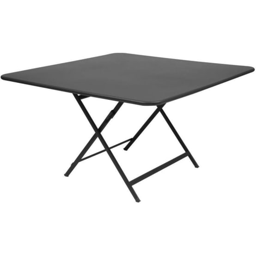

In [ ]:
url1 = "https://res.cloudinary.com/idf-retail/image/fetch/w_554,f_auto/https://enseignecompublicprd.blob.core.windows.net/enseignecompublicprd/Riversand/AssetExport/20158969.5709193821007.46433.40034579.jpeg"
url2 = "https://res.cloudinary.com/idf-retail/image/fetch/w_554,f_auto/https://enseignecompublicprd.blob.core.windows.net/enseignecompublicprd/Riversand/AssetExport/01430675.3100540279243.6268.90029841.jpg"
url3 = "https://res.cloudinary.com/idf-retail/image/fetch/w_554,f_auto/https://enseignecompublicprd.blob.core.windows.net/enseignecompublicprd/Riversand/AssetExport/20158902.4260657724612.46433.40033680.jpg"
new_image = download_image(url2).resize((256, 256))
new_image

Création du mask

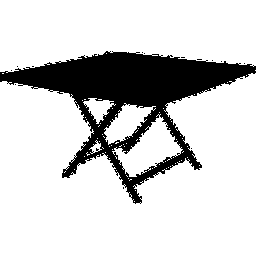

In [ ]:
# Create a copy of the original image with an RGB mode
inverted_image = new_image.convert("RGB")

# Get the image data as a list of RGB tuples
image_data = list(inverted_image.getdata())

# Iterate through the image data and swap white (255, 255, 255) and black (0, 0, 0) pixels
for i, pixel in enumerate(image_data):
    r, g, b = pixel
    if (r, g, b) == (255, 255, 255):  # Check for white pixels
        image_data[i] = (0, 0, 0)  # Set white pixel to black
    else:
        image_data[i] = (255, 255, 255)  # Set non-white pixel to white

# Update the image with the modified data
inverted_image.putdata(image_data)

mask = new_image.convert("RGB")

# Get the image data as a list of RGB tuples
image_data = list(inverted_image.getdata())

# Iterate through the image data and invert the colors (replace white with black and vice versa)
for i, pixel in enumerate(image_data):
    r, g, b = pixel
    image_data[i] = (255 - r, 255 - g, 255 - b)  # Invert the colors

# Update the image with the modified data
mask.putdata(image_data)

mask

Choix du fond d'écran voulu

In [ ]:
prompt = "background of a landscape, garden"

Génération des images

In [ ]:
num_images = 5
image_array = []

for _ in range(num_images):
    image = pipeline(prompt=prompt , image=new_image, mask_image=mask, num_inference_steps=20).images[0]
    image_array.append(image)

# Save or display the images
for i, img in enumerate(image_array):
    img.save(f"image_{i}.png")  # Save the images with different filenames

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Affichage des images


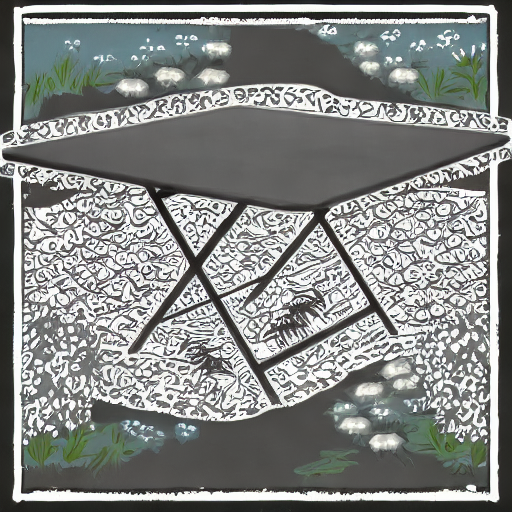
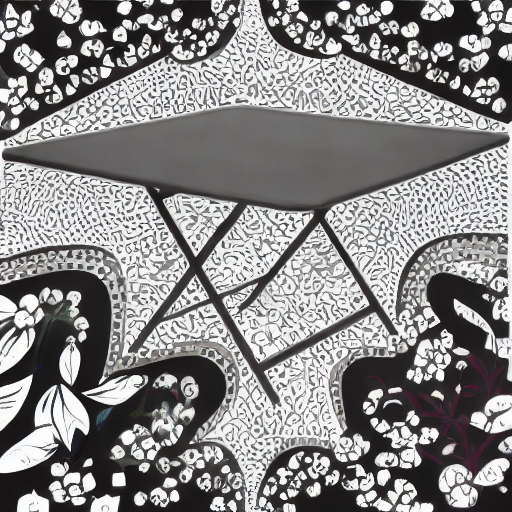
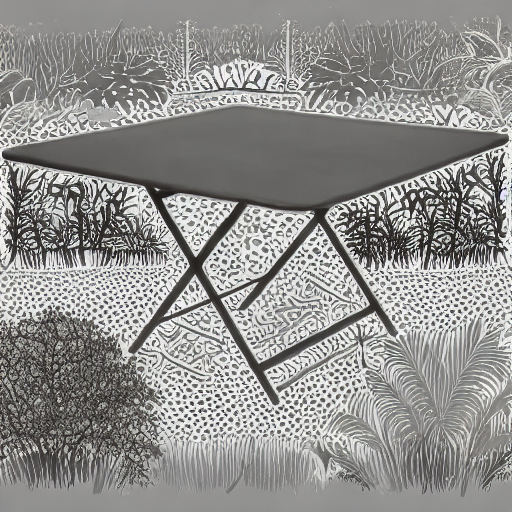
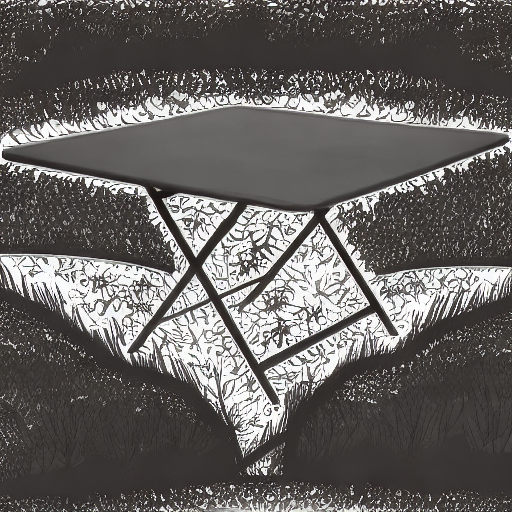
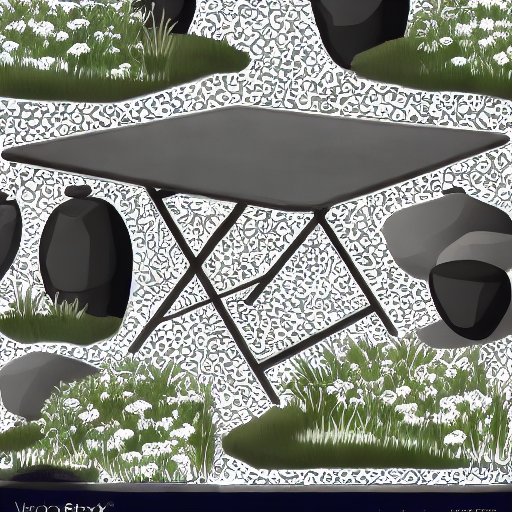

In [ ]:
from IPython.display import display, HTML
from PIL import Image
import io
import base64

# Assuming you have a list of image file paths
image_paths = ["image_0.png", "image_1.png", "image_2.png", "image_3.png", "image_4.png",]

# Create HTML code to arrange images horizontally
html_code = '<div style="display:flex; flex-direction:row;">'
for path in image_paths:
    with open(path, "rb") as image_file:
        image_data = image_file.read()
        base64_image = base64.b64encode(image_data).decode()
        img_html = f'<img src="data:image/png;base64,{base64_image}" style="margin: 5px;">'
        html_code += img_html
html_code += '</div>'

# Display the HTML code to show images horizontally
display(HTML(html_code))